Emily Ziyi Xiao
9/27/2022
Assignment 2

Data Import

In [228]:
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv('purchase_credit_card.csv')
data.head(5)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [229]:
print(data.shape)
print(data.columns) # check column names
data.describe() # Get the Simple Summary Statistics

(442458, 11)
Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Description', 'Amount', 'Vendor',
       'Transaction Date', 'Posted Date', 'Merchant Category Code (MCC)'],
      dtype='object')


,Year-Month,Agency Number,Amount
count,442458.000000,442458.000000,4.424580e+05
mean,201357.284375,42785.860353,4.249912e+02
std,47.107417,33378.461293,5.266509e+03
min,201307.000000,1000.000000,-4.286304e+04
25%,201309.000000,1000.000000,3.091000e+01
50%,201401.000000,47700.000000,1.048900e+02
75%,201404.000000,76000.000000,3.450000e+02
max,201406.000000,98000.000000,1.903858e+06


Data Preparation

In [230]:
# change column names
data.columns = ['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
              'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor', 'Transaction_Date',
              'Posted_Date', 'Merchant_Category']
data.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [231]:
#Creating separate Year and Month columns for future feature engineering
# Converting Transaction_Date and Posted_date from Python Object data type to datetime
data['Transaction_Date']=pd.to_datetime(data['Transaction_Date'])
data['Posted_Date']=pd.to_datetime(data['Posted_Date'])

data['Year_Month'].dtype
data['Year_Month']=pd.to_datetime(data['Year_Month'], format='%Y%m')
data['Year'] = data['Year_Month'].dt.year
data['Month'] = data['Year_Month'].dt.month
#Creating 'Week_Number' from 'Transaction_Date'
data['Week_Number'] = data['Transaction_Date'].dt.isocalendar().week

#Creating 'Day_of_Week' from 'Transaction_Date'
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data['Day_of_Week'] = data['Transaction_Date'].dt.dayofweek.map(dayOfWeek)

data['Day_of_Week'].value_counts()

Wednesday    89644
Thursday     87537
Tuesday      86919
Friday       79917
Monday       61809
Saturday     26307
Sunday       10325
Name: Day_of_Week, dtype: int64

In [232]:
data.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday


# Feature 1: ratio of amount spending and mean spending by merchant category

In [233]:
# create average spending group by agency and merchant category
stat_by_agency = data.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].mean()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['AVG_amount']
stat_by_agency

AVG_amount
Agency_Name                     Merchant_Category                                     
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED  115.120000
                                CATALOG MERCHANTS                           -53.344286
                                COMPUTER NETWORK/INFORMATION SERVICES        18.340000
                                DRUG STORES AND PHARMACIES                  153.450000
                                GROCERY STORES,AND SUPERMARKETS              74.525455
...                                                                                ...
`DEPARTMENT OF EDUCATION        TELECOMMUNICATION SERVICES                  118.054000
                                TRAVEL AGENCIES                              24.253731
                                TROPICANA RESORT AND CASINO                 481.600000
                                UNITED AIRLINES                             310.547368
                                WYNDHAM HOTELS                               93.282857

[8427 rows x 1 columns]

In [234]:
# add the new feature average spending to the dataset
data1 = pd.merge(data, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category'])
# Feature 1: ratio of amount spending and mean spending by merchant category
data1['agency_merchant_avg_ratio_amount'] = np.where(data1['AVG_amount']==0,0, data1['Amount'] / data1['AVG_amount'])
data1['agency_merchant_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.895609e-01
std      7.547215e+13
min     -2.191001e+16
25%      1.771615e-01
50%      5.153201e-01
75%      1.102916e+00
max      2.191001e+16
Name: agency_merchant_avg_ratio_amount, dtype: float64

This feature is generated in the example. It is possible that comparing a cardholder to his agency could find outliers, so we have the ratio of amount spending and mean spending by merchant category.

In [235]:
# cut by percentile for plotting
var = 'agency_merchant_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
data1[binned_var] = pd.qcut( data1[var],percentile)
data1[['agency_merchant_avg_ratio_amount_D']]

,agency_merchant_avg_ratio_amount_D
0,"(1.298, 3.515]"
1,"(0.515, 1.298]"
2,"(0.133, 0.515]"
3,"(1.298, 3.515]"
4,"(0.133, 0.515]"
...,...
442453,"(0.515, 1.298]"
442454,"(0.133, 0.515]"
442455,"(0.0212, 0.133]"
442456,"(8.712, 2.1910012187157464e+16]"


<AxesSubplot:xlabel='agency_merchant_avg_ratio_amount_D', ylabel='count'>

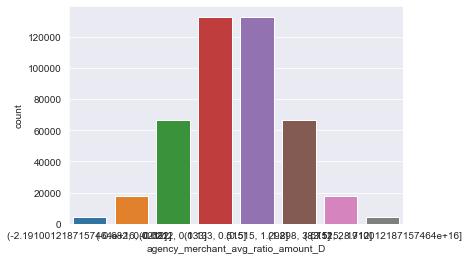

In [236]:
sns.countplot(x="agency_merchant_avg_ratio_amount_D", data=data1)

[Text(0, 0, '(-2.1910012187157464e+16, -0.682]'),
 Text(1, 0, '(-0.682, 0.0212]'),
 Text(2, 0, '(0.0212, 0.133]'),
 Text(3, 0, '(0.133, 0.515]'),
 Text(4, 0, '(0.515, 1.298]'),
 Text(5, 0, '(1.298, 3.515]'),
 Text(6, 0, '(3.515, 8.712]'),
 Text(7, 0, '(8.712, 2.1910012187157464e+16]')]

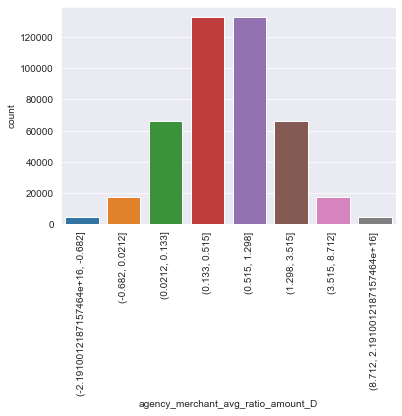

In [237]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_avg_ratio_amount_D", data=data1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [238]:
data1[data1['agency_merchant_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_avg_ratio_amount,agency_merchant_avg_ratio_amount_D
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,427.634060,2.081219,"(1.298, 3.515]"
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,170.060436,14.259636,"(8.712, 2.1910012187157464e+16]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,170.060436,14.259636,"(8.712, 2.1910012187157464e+16]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.00,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,392.641168,9.122833,"(8.712, 2.1910012187157464e+16]"
35,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,GODSEY,R,GENERAL PURCHASE,407.85,OPTIMUM ENERGY PROD,2013-07-26,2013-07-29,HARDWARE STORES,2013,7,30,Friday,170.060436,2.398265,"(1.298, 3.515]"


# Feature 2: ratio of amount spending and median spending by merchant category

In [239]:
# create average spending group by agency and merchant category
stat_by_agency = data.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].median()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['Median_amount']
stat_by_agency

Median_amount
Agency_Name                     Merchant_Category                                        
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED         115.12
                                CATALOG MERCHANTS                                   38.16
                                COMPUTER NETWORK/INFORMATION SERVICES               18.34
                                DRUG STORES AND PHARMACIES                         153.45
                                GROCERY STORES,AND SUPERMARKETS                     61.57
...                                                                                   ...
`DEPARTMENT OF EDUCATION        TELECOMMUNICATION SERVICES                         113.74
                                TRAVEL AGENCIES                                     25.00
                                TROPICANA RESORT AND CASINO                        481.60
                                UNITED AIRLINES                                    510.60
                                WYNDHAM HOTELS                                      87.00

[8427 rows x 1 columns]

In [240]:
# add the new feature average spending to the dataset
data2 = pd.merge(data1, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category'])
# Feature 2: ratio of amount spending and median spending by merchant category
data2['agency_merchant_median_ratio_amount'] = np.where(data2['Median_amount']==0,0, data2['Amount'] / data2['Median_amount'])
data2['agency_merchant_median_ratio_amount'].describe()

count    442458.000000
mean          4.952685
std        1078.581350
min       -1003.176471
25%           0.466090
50%           1.000000
75%           2.121102
max      528116.052705
Name: agency_merchant_median_ratio_amount, dtype: float64

This feature is also generated in the example. It is possible that comparing a cardholder to his agency could find outliers, so instead of mean, we have the ratio of amount spending and median spending by merchant category.

In [241]:
# cut by percentile for plotting
var = 'agency_merchant_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
data2[binned_var] = pd.qcut( data2[var],percentile)

[Text(0, 0, '(-1003.177, -1.121]'),
 Text(1, 0, '(-1.121, 0.0653]'),
 Text(2, 0, '(0.0653, 0.362]'),
 Text(3, 0, '(0.362, 1.0]'),
 Text(4, 0, '(1.0, 2.691]'),
 Text(5, 0, '(2.691, 9.283]'),
 Text(6, 0, '(9.283, 28.085]'),
 Text(7, 0, '(28.085, 528116.053]')]

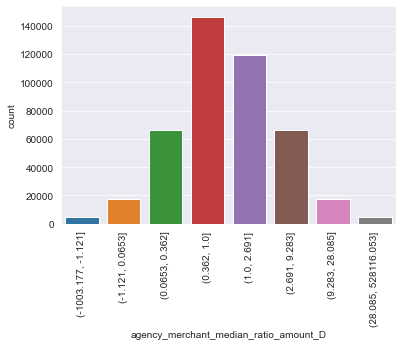

In [242]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_median_ratio_amount_D", data=data2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [243]:
data2[data2['agency_merchant_median_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_avg_ratio_amount,agency_merchant_avg_ratio_amount_D,Median_amount,agency_merchant_median_ratio_amount,agency_merchant_median_ratio_amount_D
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,...,2013,7,31,Tuesday,427.634060,2.081219,"(1.298, 3.515]",250.000,3.560000,"(2.691, 9.283]"
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,...,2013,7,31,Tuesday,59.832149,1.611007,"(1.298, 3.515]",32.485,2.967216,"(2.691, 9.283]"
5,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,2013-07-31,...,2013,7,31,Monday,217.254954,1.814826,"(1.298, 3.515]",181.940,2.167088,"(1.0, 2.691]"
12,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McLemore,A,GENERAL PURCHASE,572.27,GIDDINGS MACHINE CO.,2013-07-30,2013-07-31,...,2013,7,31,Tuesday,436.425953,1.311265,"(1.298, 3.515]",187.000,3.060267,"(2.691, 9.283]"
14,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Meints,K,GENERAL PURCHASE,445.00,OK DEPT OF VO-TECH ED,2013-07-30,2013-07-31,...,2013,7,31,Tuesday,308.598782,1.442002,"(1.298, 3.515]",91.500,4.863388,"(2.691, 9.283]"


# Feature 3: month average by merchant category

In [244]:
# create month group by agency and merchant category
stat_by_agency_month = data.groupby(['Agency_Name', 'Merchant_Category'])['Month'].mean()
stat_by_agency_month = pd.DataFrame(stat_by_agency_month)
stat_by_agency_month.columns = ['Month_mean']
stat_by_agency_month

Month_mean
Agency_Name                     Merchant_Category                                     
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED   11.000000
                                CATALOG MERCHANTS                             9.000000
                                COMPUTER NETWORK/INFORMATION SERVICES        10.000000
                                DRUG STORES AND PHARMACIES                   12.000000
                                GROCERY STORES,AND SUPERMARKETS               9.090909
...                                                                                ...
`DEPARTMENT OF EDUCATION        TELECOMMUNICATION SERVICES                    8.800000
                                TRAVEL AGENCIES                               9.111940
                                TROPICANA RESORT AND CASINO                   9.000000
                                UNITED AIRLINES                              10.210526
                                WYNDHAM HOTELS                                8.857143

[8427 rows x 1 columns]

In [245]:
# add the new feature average month to the dataset
data3 = pd.merge(data2, stat_by_agency_month, how='left', on=['Agency_Name', 'Merchant_Category'])
# Feature 3: month average by merchant category
data3['agency_merchant_month_mean'] = np.where(data3['Month_mean']==0,0, data3['Month'])
data3['agency_merchant_month_mean'].describe()

count    442458.000000
mean          6.378526
std           3.359571
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: agency_merchant_month_mean, dtype: float64

It would be useful to compare each month's transaction to find the anomaly. Therefore, I created a feature that has the mean of the month.

# Feature 4: ratio of month average by merchant category

In [247]:
# add the new feature average month to the dataset
data4 = data3
# Feature 4: ratio of month average by merchant category
data4['agency_merchant_month_mean_ratio'] = np.where(data4['Month_mean']==0,0, data4['Month'] / data4['Month_mean'])
data4['agency_merchant_month_mean_ratio'].describe()

count    442458.000000
mean          1.000000
std           0.519392
min           0.096491
25%           0.586937
50%           1.000000
75%           1.415730
max           5.777778
Name: agency_merchant_month_mean_ratio, dtype: float64

Same as previous one, it would be useful to compare each month's transaction to find the anomaly. The ratio of the mean could be more useful to see patterns. Therefore, I created a feature that has the ratio of the mean of the month.

# Feature 5: month median by merchant category

In [248]:
# create month group by agency and merchant category
stat_by_agency_month = data.groupby(['Agency_Name', 'Merchant_Category'])['Month'].median()
stat_by_agency_month = pd.DataFrame(stat_by_agency_month)
stat_by_agency_month.columns = ['Month_median']

In [249]:
# add the new feature median month to the dataset
data5 = pd.merge(data4, stat_by_agency_month, how='left', on=['Agency_Name', 'Merchant_Category'])
# Feature 5: month median by merchant category
data5['agency_merchant_month_median'] = np.where(data5['Month_median']==0,0, data5['Month'])
data5['agency_merchant_month_median'].describe()

count    442458.000000
mean          6.378526
std           3.359571
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: agency_merchant_month_median, dtype: float64

Similar to the 3rd feature, it would be useful to compare each month's transaction to find the anomaly. The median would give another perspective than the mean Therefore, I created a feature that has the median of the month.

# Feature 6: ratio of month median by merchant category

In [251]:
# add the new feature median month to the dataset
data6 = data5
# Feature 6: ratio of month median by merchant category
data6['agency_merchant_month_median_ratio'] = np.where(data6['Month_median']==0,0, data6['Month'] / data6['Month_median'])
data6['agency_merchant_month_median_ratio'].describe()

count    442458.000000
mean          1.020104
std           0.561151
min           0.083333
25%           0.571429
50%           1.000000
75%           1.428571
max          12.000000
Name: agency_merchant_month_median_ratio, dtype: float64

Same as previous one, it would be useful to compare each month's transaction to find the anomaly. The ratio of the median could be more useful to see patterns. Therefore, I created a feature that has the ratio of the median of the month.

# Feature 7: spend amount mean for each user

In [252]:
# create spending amount group by cardholder first and last name
cardholder_name = data.groupby(['Cardholder_Last_Name', 'Cardholder_First_Initial'])['Amount'].mean()
cardholder_name = pd.DataFrame(cardholder_name)
cardholder_name.columns = ['User_mean']

In [253]:
# add the new feature mean for each user
data7 = pd.merge(data6, cardholder_name, how='left', on=['Cardholder_Last_Name', 'Cardholder_First_Initial'])
# Feature 7: spend amount mean for each user
data7['cardholder_amount_mean'] = np.where(data7['User_mean']==0,0, data7['User_mean'])
data7['cardholder_amount_mean'].describe()

count    442458.000000
mean        424.991170
std        2432.067949
min       -1394.880000
25%         176.393310
50%         279.568542
75%         413.423714
max      609039.725000
Name: cardholder_amount_mean, dtype: float64

Comparing each transaction with the average of this user could be helpful to detect anomaly. Therefore, I created a feature that calculate the mean of each user.

# Feature 8: ratio of spend amount mean for each user

In [254]:
# add the new feature mean for each user
data8 = data7
# Feature 8: ratio of spend amount mean for each user
data8['cardholder_amount_mean_ratio'] = np.where(data8['User_mean']==0,0, data8['User_mean']/data8['Amount'])
data8['cardholder_amount_mean_ratio'].describe()

count    4.424580e+05
mean     7.510932e+00
std      2.289283e+04
min     -7.612997e+06
25%      7.357778e-01
50%      2.018559e+00
75%      6.176781e+00
max      7.612997e+06
Name: cardholder_amount_mean_ratio, dtype: float64

Similar to previous one, calculate the ratio of transaction with the mean would be more helpful to see the pattern.

# Feature 9: spend amount median for each user

In [255]:
# create spending amount group by cardholder first and last name
cardholder_name = data.groupby(['Cardholder_Last_Name', 'Cardholder_First_Initial'])['Amount'].median()
cardholder_name = pd.DataFrame(cardholder_name)
cardholder_name.columns = ['User_median']

In [256]:
# add the new feature mean for each user
data9 = pd.merge(data8, cardholder_name, how='left', on=['Cardholder_Last_Name', 'Cardholder_First_Initial'])
# Feature 9: spend amount median for each user
data9['cardholder_amount_median'] = np.where(data9['User_median']==0,0, data9['User_median'])
data9['cardholder_amount_median'].describe()

count    442458.000000
mean        159.882811
std         461.360600
min        -214.170000
25%          68.610000
50%         111.500000
75%         179.960000
max      171619.610000
Name: cardholder_amount_median, dtype: float64

Since the mean could be affected by outliers, comparing the median with each transaction of each user could give a different perspective for detecting anomaly. Therefore, I created a feature that shows the median of each user.

# Feature 10: ratio of spend amount median for each user

In [257]:
# add the new feature mean for each user
data10 = data9
# Feature 10: ratio of spend amount median for each user
data10['cardholder_amount_median_ratio'] = np.where(data10['User_median']==0,0, data10['User_median']/data10['Amount'])
data10['cardholder_amount_median_ratio'].describe()

count    442458.000000
mean          2.764035
std         139.273863
min      -43757.000000
25%           0.333590
50%           0.927917
75%           2.197837
max       32198.000000
Name: cardholder_amount_median_ratio, dtype: float64

This feature calculates the ratio of median with each transaction of user. It could give a pattern of each transaction and better find the anomaly than previous one.

# Feature 11: spend amount max for each user

In [258]:
# create spending amount group by cardholder first and last name
cardholder_name = data.groupby(['Cardholder_Last_Name', 'Cardholder_First_Initial'])['Amount'].max()
cardholder_name = pd.DataFrame(cardholder_name)
cardholder_name.columns = ['User_max']

In [259]:
data10

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,agency_merchant_month_mean_ratio,Month_median,agency_merchant_month_median,agency_merchant_month_median_ratio,User_mean,cardholder_amount_mean,cardholder_amount_mean_ratio,User_median,cardholder_amount_median,cardholder_amount_median_ratio
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,...,1.172103,6.0,7,1.166667,269.899489,269.899489,0.303258,217.095,217.095,0.243927
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,...,1.121239,6.0,7,1.166667,269.899489,269.899489,0.731514,217.095,217.095,0.588397
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,...,1.097809,7.0,7,1.000000,434.824266,434.824266,2.622267,98.000,98.000,0.591002
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,...,1.083031,6.0,7,1.166667,364.359929,364.359929,3.780059,207.820,207.820,2.156033
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,...,1.107162,6.0,7,1.166667,93.818028,93.818028,0.744824,36.980,36.980,0.293585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442453,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,992.00,TOTAL VALVE SYSTEMS,2014-06-20,2014-06-23,...,0.759099,9.0,6,0.666667,10961.525862,10961.525862,11.049925,1720.000,1720.000,1.733871
442454,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,2415.00,PRYOR WASTE & RECYCLING L,2014-06-20,2014-06-23,...,0.889525,7.0,6,0.857143,10961.525862,10961.525862,4.538934,1720.000,1720.000,0.712215
442455,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,177.50,ACCURATE ENVIROMENTAL LAB,2014-06-20,2014-06-23,...,0.969619,6.0,6,1.000000,10961.525862,10961.525862,61.755075,1720.000,1720.000,9.690141
442456,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,32457.00,RED BUD SERVICE INC,2014-06-19,2014-06-23,...,1.005025,6.0,6,1.000000,10961.525862,10961.525862,0.337725,1720.000,1720.000,0.052993


In [260]:
# add the new feature mean for each user
data11 = pd.merge(data10, cardholder_name, how='left', on=['Cardholder_Last_Name', 'Cardholder_First_Initial'])
# Feature 11: spend amount max for each user
data11['cardholder_amount_max'] = np.where(data11['User_max']==0,0, data11['User_max'])
data11['cardholder_amount_max'].describe()

count    4.424580e+05
mean     1.072733e+04
std      6.735747e+04
min     -2.141700e+02
25%      1.849600e+03
50%      3.792580e+03
75%      4.981000e+03
max      1.903858e+06
Name: cardholder_amount_max, dtype: float64

Very large amount of transaction needs more attention and will be more harmful if we fail to detect them. Therefore, I created a feature that calculated the max amount of spending for a single transaction.

# Feature 12: spend amount min for each user

In [261]:
# create spending amount group by cardholder first and last name
cardholder_name = data.groupby(['Cardholder_Last_Name', 'Cardholder_First_Initial'])['Amount'].min()
cardholder_name = pd.DataFrame(cardholder_name)
cardholder_name.columns = ['User_min']
cardholder_name

,,User_min
Cardholder_Last_Name,Cardholder_First_Initial,
15000,1,4626.46
24100,2,-35.29
42000,4,0.14
44600,4,111.99
48000,4,-250.00
...,...,...
cohen,T,-23.76
d'Offay,J,-988.07
de Leon,R,-177.88


In [262]:
# add the new feature mean for each user
data12 = pd.merge(data11, cardholder_name, how='left', on=['Cardholder_Last_Name', 'Cardholder_First_Initial'])
# Feature 12: spend amount min for each user
data12['cardholder_amount_min'] = np.where(data12['User_min']==0,0, data12['User_min'])
data12['cardholder_amount_min'].describe()

count    442458.000000
mean      -1186.815170
std        3349.856845
min      -42863.040000
25%       -1170.700000
50%        -366.740000
75%         -67.950000
max       29728.880000
Name: cardholder_amount_min, dtype: float64

Beside the large transaction, unexpectedly high amount of repayment could also be suspicious. Therefore, I created a feature that records the min number for a single transaction for each user.

# Feature 13: spend amount mean for each agency

In [264]:
# create spending amount mean group by Agency Name
cardholder_name = data.groupby(['Agency_Name'])['Amount'].mean()
cardholder_name = pd.DataFrame(cardholder_name)
cardholder_name.columns = ['Agency_mean']
cardholder_name

,Agency_mean
Agency_Name,
ARDMORE HIGHER EDUCATION CENTER,107.701356
ATTORNEY GENERAL,435.798823
BD. OF CHEM. TEST ALCOHOL/DRUG,384.162561
BD. OF EXAM. FOR LT CARE ADMIN,139.612353
BD. OF EXAM. FOR LT CARE ADMIN.,79.341333
...,...
WATER RESOURCES BOARD,247.300288
WILL ROGERS MEMORIAL COMMISSION,143.577083
WORKER'S COMP. COMMISSION,60.000000


In [265]:
# add the new feature mean for each user
data13 = pd.merge(data12, cardholder_name, how='left', on=['Agency_Name'])
# Feature 13: spend amount mean for each agency
data13['agency_amount_mean'] = np.where(data13['Agency_mean']==0,0, data13['Agency_mean'])
data13['agency_amount_mean'].describe()

count    442458.000000
mean        424.991170
std         477.934023
min          22.017037
25%         291.209448
50%         326.837436
75%         421.091646
max      171619.610000
Name: agency_amount_mean, dtype: float64

Sometimes data from one single user cannot detect all anomalies. Therefore, I calculated the mean of transaction amount for users under one agency.

# Feature 14: spend amount median for each agency

In [266]:
# create spending amount mean group by Agency Name
cardholder_name = data.groupby(['Agency_Name'])['Amount'].median()
cardholder_name = pd.DataFrame(cardholder_name)
cardholder_name.columns = ['Agency_median']
cardholder_name

,Agency_median
Agency_Name,
ARDMORE HIGHER EDUCATION CENTER,66.780
ATTORNEY GENERAL,127.000
BD. OF CHEM. TEST ALCOHOL/DRUG,206.495
BD. OF EXAM. FOR LT CARE ADMIN,68.000
BD. OF EXAM. FOR LT CARE ADMIN.,65.520
...,...
WATER RESOURCES BOARD,83.000
WILL ROGERS MEMORIAL COMMISSION,109.000
WORKER'S COMP. COMMISSION,60.000


In [267]:
# add the new feature median for each user
data14 = pd.merge(data13, cardholder_name, how='left', on=['Agency_Name'])
# Feature 14: spend amount median for each agency
data14['agency_amount_median'] = np.where(data14['Agency_median']==0,0, data14['Agency_median'])
data14['agency_amount_median'].describe()

count    442458.000000
mean        111.578082
std         367.108444
min           4.750000
25%          90.335000
50%         100.000000
75%         118.960000
max      171619.610000
Name: agency_amount_median, dtype: float64

Similar to the previous one, when data from one single user cannot detect all anomalies, we can use the data from all users under an agency. The medium number will not be affected by the outliers and sometime might be more reliable than the mean.

# Feature 15: spend amount max for each agency

In [272]:
# create spending amount mean group by Agency Name
cardholder_name = data.groupby(['Agency_Name'])['Amount'].max()
cardholder_name = pd.DataFrame(cardholder_name)
cardholder_name.columns = ['Agency_max']
cardholder_name

,Agency_max
Agency_Name,
ARDMORE HIGHER EDUCATION CENTER,750.17
ATTORNEY GENERAL,15223.30
BD. OF CHEM. TEST ALCOHOL/DRUG,1580.00
BD. OF EXAM. FOR LT CARE ADMIN,1500.00
BD. OF EXAM. FOR LT CARE ADMIN.,192.00
...,...
WATER RESOURCES BOARD,4999.00
WILL ROGERS MEMORIAL COMMISSION,503.84
WORKER'S COMP. COMMISSION,60.00


In [273]:
# add the new feature median for each user
data15 = pd.merge(data14, cardholder_name, how='left', on=['Agency_Name'])
# Feature 15: spend amount max for each agency
data15['agency_amount_max'] = np.where(data15['Agency_max']==0,0, data15['Agency_max'])
data15['agency_amount_max'].describe()

count    4.424580e+05
mean     3.318134e+05
std      6.349259e+05
min      3.558000e+01
25%      2.796738e+04
50%      6.100072e+04
75%      1.142032e+05
max      1.903858e+06
Name: agency_amount_max, dtype: float64

Very large amount of transaction needs more attention and will be more harmful if we fail to detect them. Therefore, I created a feature that calculated the max amount of spending for all transactions under each agency.

In [276]:
data15.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,User_max,cardholder_amount_max,User_min,cardholder_amount_min,Agency_mean,agency_amount_mean,Agency_median,agency_amount_median,Agency_max,agency_amount_max
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,...,1970.00,1970.00,-641.69,-641.69,291.209448,291.209448,100.0,100.0,27967.38,27967.38
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,...,1970.00,1970.00,-641.69,-641.69,291.209448,291.209448,100.0,100.0,27967.38,27967.38
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,...,3915.20,3915.20,-166.95,-166.95,291.209448,291.209448,100.0,100.0,27967.38,27967.38
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,...,1931.25,1931.25,-164.70,-164.70,291.209448,291.209448,100.0,100.0,27967.38,27967.38
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,...,679.18,679.18,-20.75,-20.75,291.209448,291.209448,100.0,100.0,27967.38,27967.38


Here is the dataframe that contain all features that are created. 